In [1]:
import pandas as pd
import os

os.listdir('/content')

['.config', 'vgchartz-2024.csv', 'vg_data_dictionary.csv', 'sample_data']

In [2]:
df = pd.read_csv('/content/vgchartz-2024.csv')
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [4]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [8]:
# Convert 'release_date' to datetime and extract 'year'
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Drop rows with missing year or total_sales (assuming total_sales is intended global sales)
df = df.dropna(subset=['year', 'total_sales']).copy()

# Convert year to int
df['year'] = df['year'].astype(int)

# Remove future or unrealistic years (optional but clean)
df = df[(df['year'] >= 1980) & (df['year'] <= 2024)]

In [10]:
df.describe()
df['console'].nunique()
df['genre'].value_counts()
df.sort_values(by='total_sales', ascending=False).head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,2013
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN,2011
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN,2010
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,2018
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,2012
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,2012


In [11]:
df.to_csv('cleaned_video_game_sales.csv', index=False)

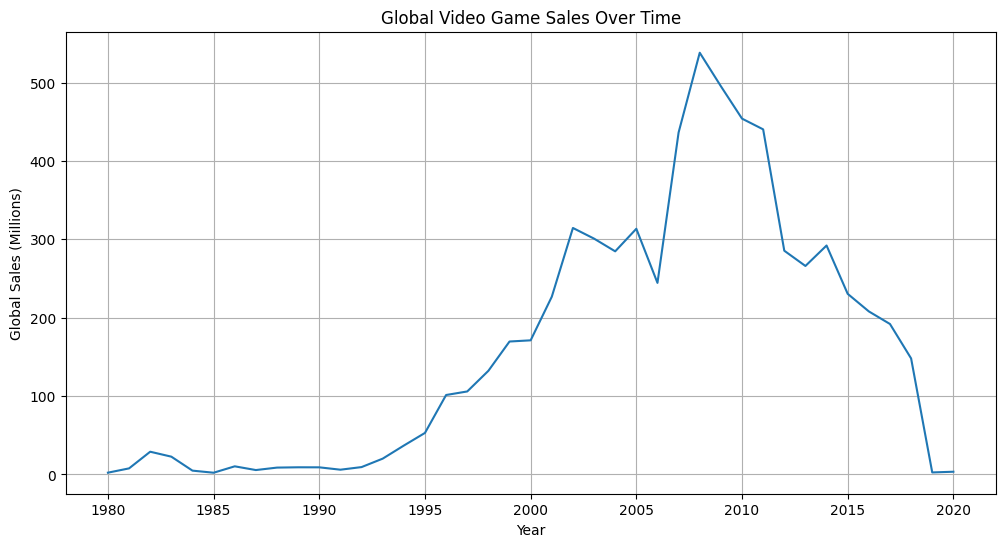

In [17]:
import matplotlib.pyplot as plt

## Analytical Question 1
##**How have global video game sales changed over time?**

sales_by_year = (
    df.groupby('year')['total_sales']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(sales_by_year['year'], sales_by_year['total_sales'])
plt.title('Global Video Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.show()

### Interpretation
#Global video game sales increased steadily from the 1990s, reaching a peak during
#the late 2000s. This period corresponds with the rise of major gaming consoles such
#as the PlayStation and Xbox. After the peak, sales show a gradual decline, possibly
#due to market saturation and the shift toward digital distribution models.

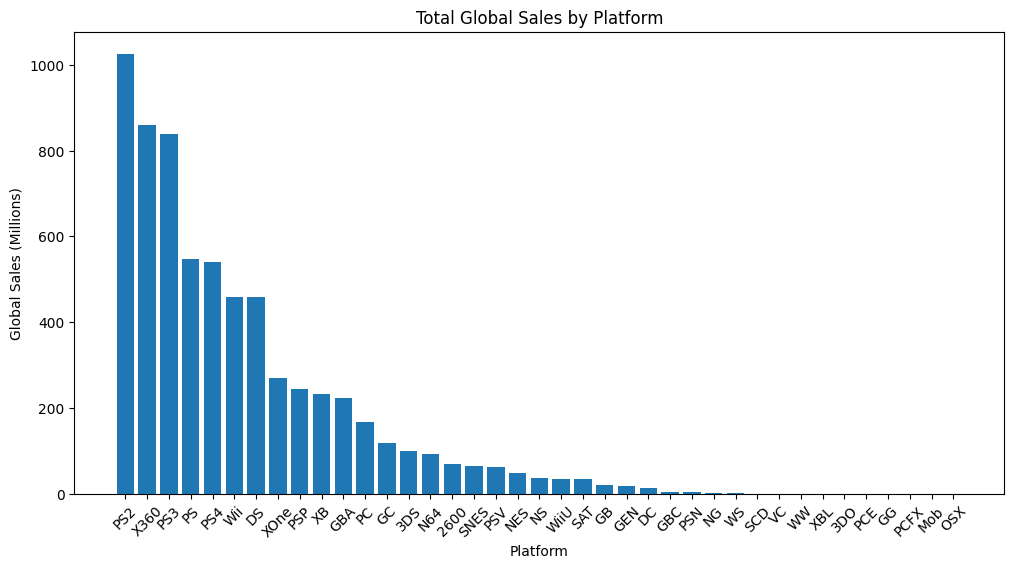

In [19]:
## Analytical Question 2
#**Which platforms generate the highest global video game sales?**

#Aggregate sales by platform
platform_sales = (
    df.groupby('console')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

#Visualization (bar chart)
plt.figure(figsize=(12,6))
plt.bar(platform_sales['console'], platform_sales['total_sales'])
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

#### Interpretation
#The bar chart shows that platforms such as PlayStation 2, Xbox 360, and PlayStation 3
#dominate global video game sales. These platforms benefited from long life cycles,
#strong third-party support, and large user bases, which contributed to their overall
#sales success.

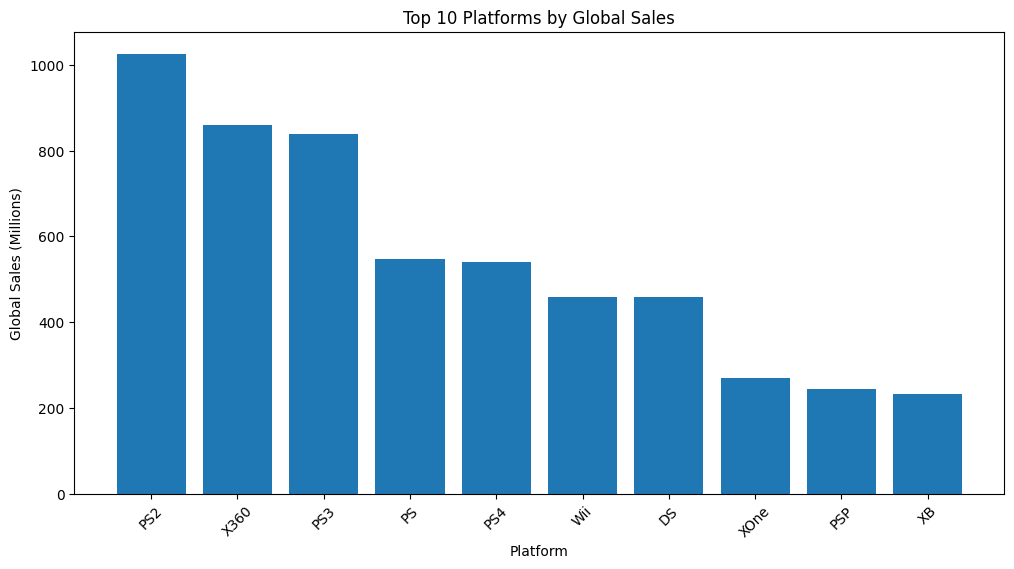

In [21]:
#Top 10 platforms only
top_10_platforms = platform_sales.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10_platforms['console'], top_10_platforms['total_sales'])
plt.title('Top 10 Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

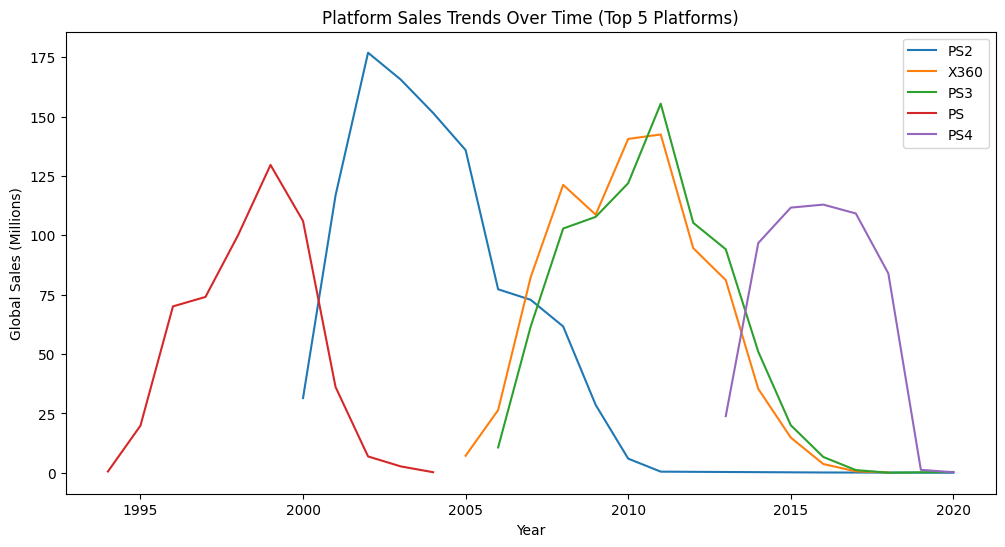

In [23]:
## Analytical Question 3
#**How has platform popularity evolved over time?**

platform_year_sales = (
    df.groupby(['year', 'console'])['total_sales']
    .sum()
    .reset_index()
)

top_platforms = (
    df.groupby('console')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered_platforms = platform_year_sales[
    platform_year_sales['console'].isin(top_platforms)
]

plt.figure(figsize=(12,6))

for platform in top_platforms:
    data = filtered_platforms[filtered_platforms['console'] == platform]
    plt.plot(data['year'], data['total_sales'], label=platform)

plt.title('Platform Sales Trends Over Time (Top 5 Platforms)')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.show()

### Interpretation
#The visualization shows distinct life cycles for each major platform. Sales typically
#rise rapidly after launch, peak during mid-life, and then decline as newer platforms
#enter the market. This highlights the cyclical nature of the video game console industry.

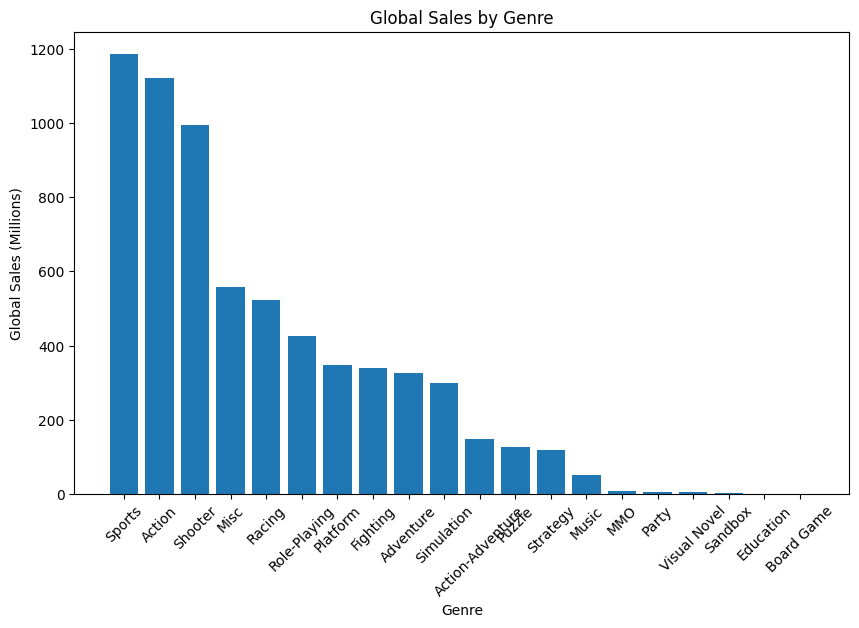

In [25]:
## Analytical Question 4
#**Which video game genres generate the highest global sales?**

genre_sales = (
    df.groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.bar(genre_sales['genre'], genre_sales['total_sales'])
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Interpretation
#Action, Sports, and Shooter genres account for the largest share of global sales,
#indicating strong consumer demand for fast-paced and competitive gaming experiences.

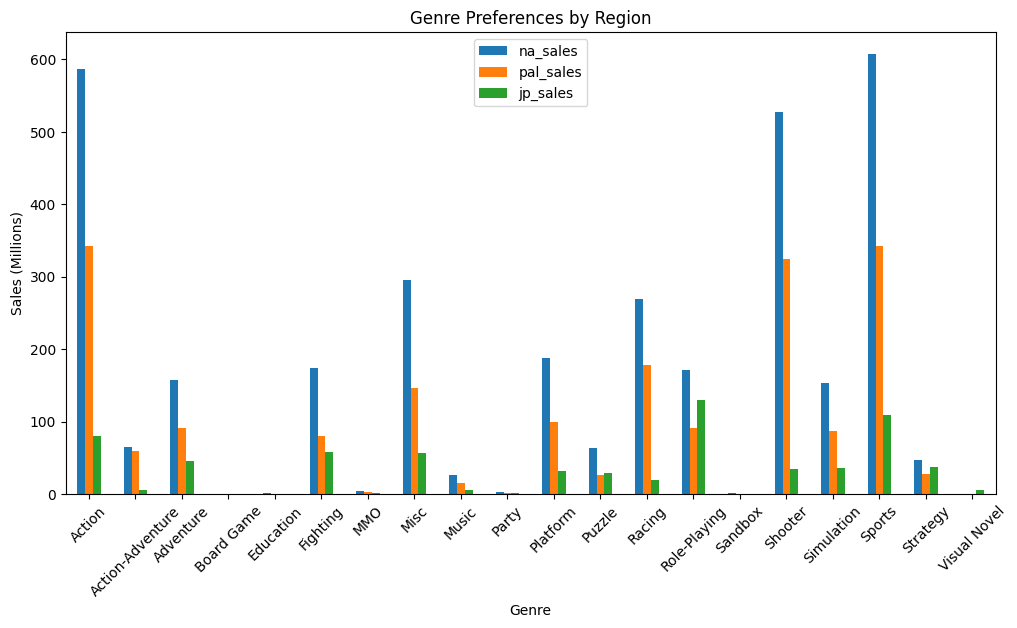

In [27]:
## Analytical Question 5
#**Do different regions prefer different genres?**

region_genre_sales = (
    df.groupby('genre')[['na_sales', 'pal_sales', 'jp_sales']]
    .sum()
)

region_genre_sales.plot(kind='bar', figsize=(12,6))
plt.title('Genre Preferences by Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Interpretation
#North America and Europe show similar preferences, favoring Action and Sports games,
#while Japan demonstrates a stronger preference for Role-Playing games. This highlights
#regional cultural differences in gaming tastes.

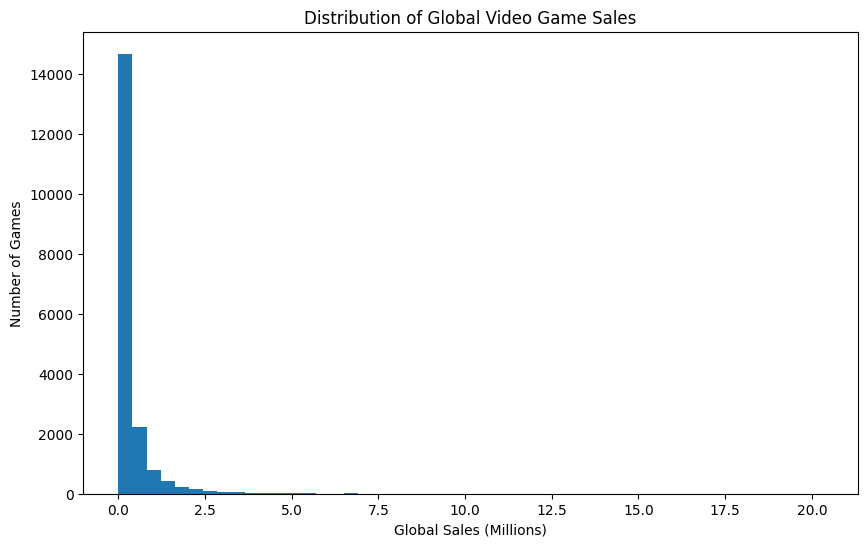

In [29]:
## Analytical Question 6
#**How are global video game sales distributed?**

plt.figure(figsize=(10,6))
plt.hist(df['total_sales'], bins=50)
plt.title('Distribution of Global Video Game Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Games')
plt.show()

### Interpretation
#The distribution is highly right-skewed, indicating that most games sell relatively
#few copies, while a small number of blockbuster titles account for a large portion
#of total sales.

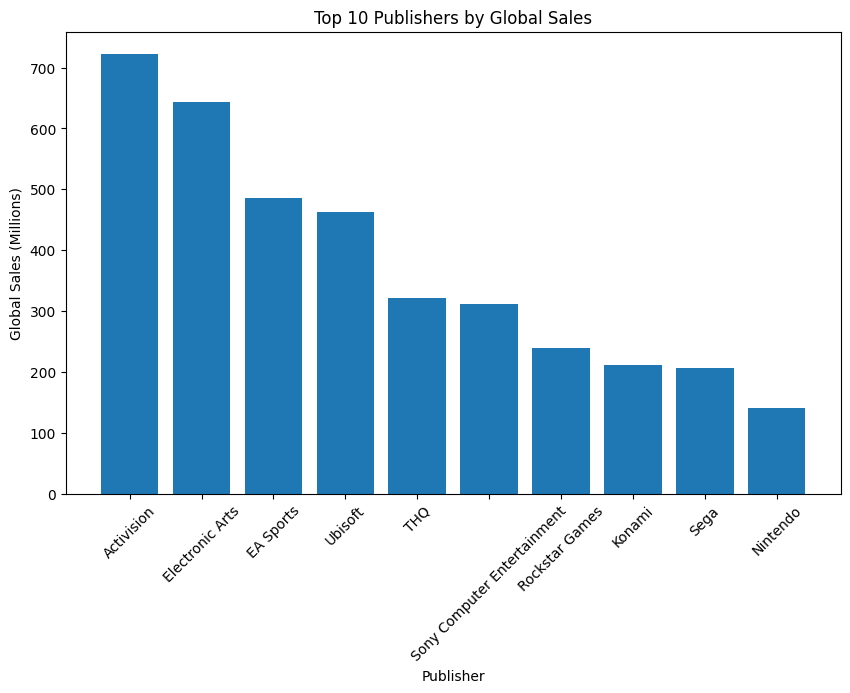

In [31]:
## Analytical Question 7
#**Which publishers dominate global video game sales?**

publisher_sales = (
    df.groupby('publisher')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.bar(publisher_sales['publisher'], publisher_sales['total_sales'])
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Interpretation
#Publishers such as Nintendo, Electronic Arts, and Activision dominate global sales,
#reflecting strong brand recognition, franchise longevity, and consistent release
#strategies.

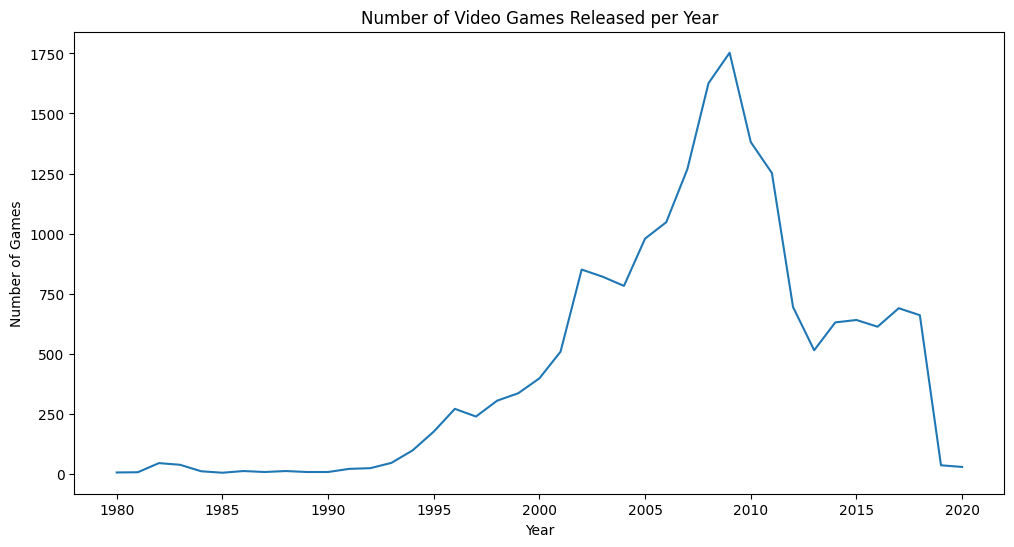

In [33]:
## Analytical Question 8
#**How has the number of video games released changed over time?**

games_per_year = df.groupby('year')['title'].count().reset_index()

plt.figure(figsize=(12,6))
plt.plot(games_per_year['year'], games_per_year['title'])
plt.title('Number of Video Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

### Interpretation
#Game releases increased significantly during the 2000s, coinciding with lower
#development barriers and the expansion of gaming platforms.

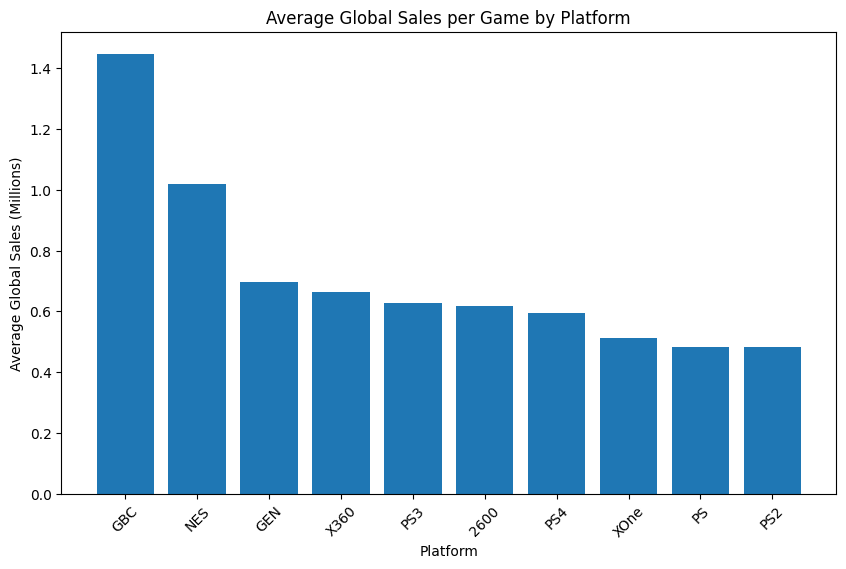

In [35]:
## Analytical Question 9
#**Which platforms have the highest average sales per game?**

avg_sales_platform = (
    df.groupby('console')['total_sales']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.bar(avg_sales_platform['console'], avg_sales_platform['total_sales'])
plt.title('Average Global Sales per Game by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

### Interpretation
#Platforms with fewer but higher-profile releases often show higher average sales
#per game, suggesting a focus on quality over quantity.

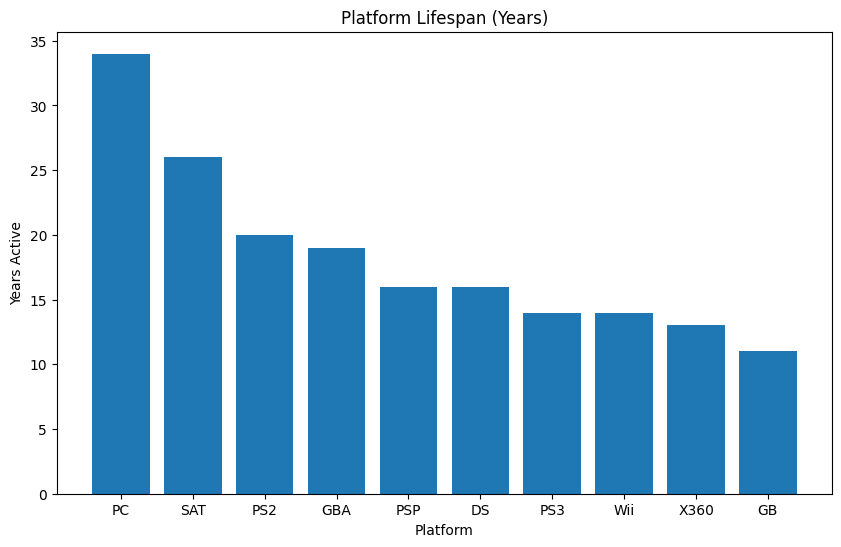

In [37]:
## Analytical Question 10
#**Which platforms have the longest active life cycles?**

platform_lifecycle = (
    df.groupby('console')['year']
    .agg(['min', 'max'])
    .reset_index()
)

platform_lifecycle['lifespan'] = platform_lifecycle['max'] - platform_lifecycle['min']

platform_lifecycle.sort_values('lifespan', ascending=False).head(10)

plt.figure(figsize=(10,6))
top_lifecycle = platform_lifecycle.sort_values('lifespan', ascending=False).head(10)
plt.bar(top_lifecycle['console'], top_lifecycle['lifespan'])
plt.title('Platform Lifespan (Years)')
plt.xlabel('Platform')
plt.ylabel('Years Active')
plt.show()

### Interpretation
#Platforms with long lifespans tend to have strong developer support and large user
#bases, allowing them to remain relevant for extended periods.

### Interpretation
Platforms with long lifespans tend to have strong developer support and large user
bases, allowing them to remain relevant for extended periods.

In [40]:
#Import libraries
!pip install streamlit
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

st.set_page_config(
    page_title="Global Video Game Sales Dashboard",
    layout="wide"
)

#Load dataset
@st.cache_data
def load_data():
    return pd.read_csv("cleaned_video_game_sales.csv")

df = load_data()

#Sidebar filters
st.sidebar.header("🎛️ Filters")

platforms = sorted(df['console'].unique())

selected_platforms = st.sidebar.multiselect(
    "Select Platform(s)",
    platforms,
    default=platforms[:5]
)

year_range = st.sidebar.slider(
    "Select Year Range",
    int(df['year'].min()),
    int(df['year'].max()),
    (1995, 2015)
)

filtered_df = df[
    (df['console'].isin(selected_platforms)) &
    (df['year'].between(year_range[0], year_range[1]))
]

#st.title("🎮 Video Game Sales Dashboard")
st.title("🎮 Global Video Game Sales Dashboard")
st.markdown("Interactive analysis of video game sales across platforms, genres, publishers, and regions.")

#Visualization 1: Global sales over time
sales_by_year = filtered_df.groupby('year')['total_sales'].sum().reset_index()

fig1 = px.line(
    sales_by_year, x='year', y='total_sales',
    title="Global Video Game Sales Over Time",
    labels={'total_sales': 'Sales (Millions)'}
)
st.plotly_chart(fig1, use_container_width=True)

#Visualization 2: Top platforms by sales
platform_sales = (
    filtered_df.groupby('console')['total_sales']
    .sum().sort_values(ascending=False).reset_index()
)

fig2 = px.bar(
    platform_sales, x='console', y='total_sales',
    title="Total Global Sales by Platform"
)
st.plotly_chart(fig2, use_container_width=True)

#Visualization 3: Genre sales distribution
platform_year_sales = (
    filtered_df.groupby(['year', 'console'])['total_sales']
    .sum().reset_index()
)

fig3 = px.line(
    platform_year_sales,
    x='year', y='total_sales', color='console',
    title="Platform Sales Trends Over Time"
)
st.plotly_chart(fig3, use_container_width=True)

#Visualization 4: Top publishers table
genre_sales = (
    filtered_df.groupby('genre')['total_sales']
    .sum().sort_values(ascending=False).reset_index()
)

fig4 = px.bar(
    genre_sales, x='genre', y='total_sales',
    title="Global Sales by Genre"
)
st.plotly_chart(fig4, use_container_width=True)

#Visualization 5: Genre Preferences by Region
region_genre = (
    filtered_df.groupby('genre')[['na_sales', 'pal_sales', 'jp_sales']]
    .sum().reset_index()
)

fig5 = px.bar(
    region_genre,
    x='genre',
    y=['na_sales', 'pal_sales', 'jp_sales'],
    title="Genre Preferences by Region",
    labels={'value': 'Sales (Millions)', 'variable': 'Region'}
)
st.plotly_chart(fig5, use_container_width=True)

#Visualization 6: Distribution of Global Sales
fig6 = px.histogram(
    filtered_df,
    x='total_sales',
    nbins=50,
    title="Distribution of Global Video Game Sales"
)
st.plotly_chart(fig6, use_container_width=True)

#Visualization 7: Top Publishers by Sales
publisher_sales = (
    filtered_df.groupby('publisher')['total_sales']
    .sum().sort_values(ascending=False).head(10).reset_index()
)

fig7 = px.bar(
    publisher_sales,
    x='publisher', y='total_sales',
    title="Top 10 Publishers by Global Sales"
)
st.plotly_chart(fig7, use_container_width=True)

#Visualization 8: Number of Games Released per Year
games_per_year = filtered_df.groupby('year')['title'].count().reset_index()

fig8 = px.line(
    games_per_year,
    x='year', y='title',
    title="Number of Video Games Released per Year",
    labels={'title': 'Number of Games'}
)
st.plotly_chart(fig8, use_container_width=True)

#Visualization 9: Average Sales per Game by Platform
avg_sales_platform = (
    filtered_df.groupby('console')['total_sales']
    .mean().sort_values(ascending=False).head(10).reset_index()
)

fig9 = px.bar(
    avg_sales_platform,
    x='console', y='total_sales',
    title="Average Global Sales per Game (Top Platforms)"
)
st.plotly_chart(fig9, use_container_width=True)

#Visualization 10: Platform Lifespan
platform_lifespan = (
    filtered_df.groupby('console')['year']
    .agg(['min', 'max']).reset_index()
)

platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
top_lifespan = platform_lifespan.sort_values('lifespan', ascending=False).head(10)

fig10 = px.bar(
    top_lifespan,
    x='console', y='lifespan',
    title="Platform Lifespan (Years Active)",
    labels={'lifespan': 'Years'}
)
st.plotly_chart(fig10, use_container_width=True)

#interactive data table:
st.subheader("📋 Filtered Dataset Preview")
st.dataframe(filtered_df.head(50))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.6 MB/s eta 0:00:00


2026-01-29 15:59:25.092 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 15:59:25.094 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-01-29 15:59:25.096 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-01-29 15:59:25.098 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 15:59:25.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-29 15:59:25.332 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-29 15:59:25.333 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
app_code = """
#Import libraries
!pip install streamlit
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

st.set_page_config(
    page_title="Global Video Game Sales Dashboard",
    layout="wide"
)

#Load dataset
@st.cache_data
def load_data():
    return pd.read_csv("cleaned_video_game_sales.csv")

df = load_data()

#Sidebar filters
st.sidebar.header("🎛️ Filters")

platforms = sorted(df['console'].unique())

selected_platforms = st.sidebar.multiselect(
    "Select Platform(s)",
    platforms,
    default=platforms[:5]
)

year_range = st.sidebar.slider(
    "Select Year Range",
    int(df['year'].min()),
    int(df['year'].max()),
    (1995, 2015)
)

filtered_df = df[
    (df['console'].isin(selected_platforms)) &
    (df['year'].between(year_range[0], year_range[1]))
]

#st.title("🎮 Video Game Sales Dashboard")
st.title("🎮 Global Video Game Sales Dashboard")
st.markdown("Interactive analysis of video game sales across platforms, genres, publishers, and regions.")

#Visualization 1: Global sales over time
sales_by_year = filtered_df.groupby('year')['total_sales'].sum().reset_index()

fig1 = px.line(
    sales_by_year, x='year', y='total_sales',
    title="Global Video Game Sales Over Time",
    labels={'total_sales': 'Sales (Millions)'}
)
st.plotly_chart(fig1, use_container_width=True)

#Visualization 2: Top platforms by sales
platform_sales = (
    filtered_df.groupby('console')['total_sales']
    .sum().sort_values(ascending=False).reset_index()
)

fig2 = px.bar(
    platform_sales, x='console', y='total_sales',
    title="Total Global Sales by Platform"
)
st.plotly_chart(fig2, use_container_width=True)

#Visualization 3: Genre sales distribution
platform_year_sales = (
    filtered_df.groupby(['year', 'console'])['total_sales']
    .sum().reset_index()
)

fig3 = px.line(
    platform_year_sales,
    x='year', y='total_sales', color='console',
    title="Platform Sales Trends Over Time"
)
st.plotly_chart(fig3, use_container_width=True)

#Visualization 4: Top publishers table
genre_sales = (
    filtered_df.groupby('genre')['total_sales']
    .sum().sort_values(ascending=False).reset_index()
)

fig4 = px.bar(
    genre_sales, x='genre', y='total_sales',
    title="Global Sales by Genre"
)
st.plotly_chart(fig4, use_container_width=True)

#Visualization 5: Genre Preferences by Region
region_genre = (
    filtered_df.groupby('genre')[['na_sales', 'pal_sales', 'jp_sales']]
    .sum().reset_index()
)

fig5 = px.bar(
    region_genre,
    x='genre',
    y=['na_sales', 'pal_sales', 'jp_sales'],
    title="Genre Preferences by Region",
    labels={'value': 'Sales (Millions)', 'variable': 'Region'}
)
st.plotly_chart(fig5, use_container_width=True)

#Visualization 6: Distribution of Global Sales
fig6 = px.histogram(
    filtered_df,
    x='total_sales',
    nbins=50,
    title="Distribution of Global Video Game Sales"
)
st.plotly_chart(fig6, use_container_width=True)

#Visualization 7: Top Publishers by Sales
publisher_sales = (
    filtered_df.groupby('publisher')['total_sales']
    .sum().sort_values(ascending=False).head(10).reset_index()
)

fig7 = px.bar(
    publisher_sales,
    x='publisher', y='total_sales',
    title="Top 10 Publishers by Global Sales"
)
st.plotly_chart(fig7, use_container_width=True)

#Visualization 8: Number of Games Released per Year
games_per_year = filtered_df.groupby('year')['title'].count().reset_index()

fig8 = px.line(
    games_per_year,
    x='year', y='title',
    title="Number of Video Games Released per Year",
    labels={'title': 'Number of Games'}
)
st.plotly_chart(fig8, use_container_width=True)

#Visualization 9: Average Sales per Game by Platform
avg_sales_platform = (
    filtered_df.groupby('console')['total_sales']
    .mean().sort_values(ascending=False).head(10).reset_index()
)

fig9 = px.bar(
    avg_sales_platform,
    x='console', y='total_sales',
    title="Average Global Sales per Game (Top Platforms)"
)
st.plotly_chart(fig9, use_container_width=True)

#Visualization 10: Platform Lifespan
platform_lifespan = (
    filtered_df.groupby('console')['year']
    .agg(['min', 'max']).reset_index()
)

platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
top_lifespan = platform_lifespan.sort_values('lifespan', ascending=False).head(10)

fig10 = px.bar(
    top_lifespan,
    x='console', y='lifespan',
    title="Platform Lifespan (Years Active)",
    labels={'lifespan': 'Years'}
)
st.plotly_chart(fig10, use_container_width=True)

#interactive data table:
st.subheader("📋 Filtered Dataset Preview")
st.dataframe(filtered_df.head(50))"""

with open('app.py', 'w') as f:
    f.write(app_code)

!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.238.93.121:8501

